### Bishoy Sokkar 
### Week 1 Assignment  


Instructions

1)  Submit a document verifying that you have successfully installed and tested Simio and Python. If you don't have Windows OS, please check the announcement history to find details on how to install Simio on Mac with the Parallel hypervisor. If you don't have Parallel, or use a different OS other than Windows or Mac, please try installing https://www.anylogic.com/



I installed the Simio Software from the Simio website but the license will expire in one month.  

In [15]:
import sys
import simpy
import matplotlib
print(f"Python Version: {sys.version}")
print(f"SimPy Version: {simpy.__version__}")
print("Python and SimPy are installed successfully!")

Python Version: 3.12.11 | packaged by Anaconda, Inc. | (main, Jun  5 2025, 12:58:53) [MSC v.1929 64 bit (AMD64)]
SimPy Version: 4.1.1
Python and SimPy are installed successfully!


2) Make your first modeling and simulation practice using the following article: https://realpython.com/simpy-simulating-with-python/ 



--- Simulation with 1 repairperson(s) ---
Machine 0 made part 1 at time 0.00
Machine 1 made part 1 at time 0.00
Machine 1 broke at time 7.60
Machine 0 made part 2 at time 10.00
Machine 0 made part 3 at time 20.00
Machine 0 made part 4 at time 30.00
Machine 1 repaired at time 37.60
Machine 1 made part 2 at time 37.60
Machine 0 made part 5 at time 40.00
Machine 1 made part 3 at time 47.60
Machine 0 made part 6 at time 50.00
Machine 1 made part 4 at time 57.60
Machine 0 made part 7 at time 60.00
Machine 1 made part 5 at time 67.60
Machine 0 made part 8 at time 70.00
Machine 1 made part 6 at time 77.60
Machine 0 made part 9 at time 80.00
Machine 1 made part 7 at time 87.60
Machine 0 made part 10 at time 90.00
Machine 1 made part 8 at time 97.60
Machine 0 made part 11 at time 100.00
Machine 1 broke at time 104.09
Machine 0 made part 12 at time 110.00
Machine 0 made part 13 at time 120.00
Machine 0 made part 14 at time 130.00
Machine 1 repaired at time 134.09
Machine 1 made part 9 at time 1

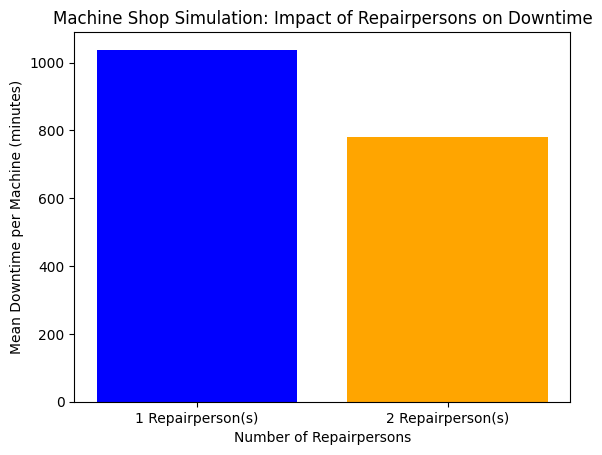

In [13]:
# SimPy Machine Shop Simulation
import random
import simpy
import statistics

# Parameters
RANDOM_SEED = 42
NUM_MACHINES = 2  # Number of machines in the shop
REPAIR_TIME = 30  # Time to repair a machine (minutes)
T_INTERFAIL = 300  # Time between failures (minutes)
SIM_TIME = 7 * 24 * 60  # Simulation time: 1 week (in minutes)
REPAIRPERSONS = [1, 2]  # Scenarios: 1 or 2 repairpersons
MEAN_DOWNTIMES = []  # Store mean downtime for each scenario

# Set random seed for reproducibility
random.seed(RANDOM_SEED)

# Machine class to model machine behavior
class Machine:
    def __init__(self, env, name, repairshop):
        self.env = env
        self.name = name
        self.repairshop = repairshop
        self.parts_made = 0
        self.broken = False
        self.downtime = 0
        self.process = env.process(self.working())
        env.process(self.break_machine())

    def working(self):
        """Machine produces parts until it breaks."""
        while True:
            try:
                while not self.broken:
                    self.parts_made += 1
                    print(f"{self.name} made part {self.parts_made} at time {self.env.now:.2f}")
                    yield self.env.timeout(10)  # Time to make one part
            except simpy.Interrupt:
                self.broken = True
                self.downtime -= self.env.now  # Start tracking downtime
                with self.repairshop.request() as req:
                    yield req
                    yield self.env.timeout(REPAIR_TIME)
                    print(f"{self.name} repaired at time {self.env.now:.2f}")
                self.broken = False
                self.downtime += self.env.now  # End tracking downtime

    def break_machine(self):
        """Machine breaks at random intervals."""
        while True:
            yield self.env.timeout(random.expovariate(1.0 / T_INTERFAIL))
            if not self.broken:
                print(f"{self.name} broke at time {self.env.now:.2f}")
                self.process.interrupt()

# Run simulation for a given number of repairpersons
def run_simulation(num_repairpersons):
    print(f"\n--- Simulation with {num_repairpersons} repairperson(s) ---")
    env = simpy.Environment()
    repairshop = simpy.Resource(env, num_repairpersons)
    machines = [Machine(env, f"Machine {i}", repairshop) for i in range(NUM_MACHINES)]
    env.run(until=SIM_TIME)
    downtimes = [machine.downtime for machine in machines]
    mean_downtime = statistics.mean(downtimes) if downtimes else 0
    print(f"Mean downtime per machine: {mean_downtime:.2f} minutes")
    return mean_downtime

# Run simulations for different numbers of repairpersons
for num in REPAIRPERSONS:
    mean_downtime = run_simulation(num)
    MEAN_DOWNTIMES.append(mean_downtime)

# Plot results
import matplotlib.pyplot as plt

plt.bar([f"{num} Repairperson(s)" for num in REPAIRPERSONS], MEAN_DOWNTIMES, color=['blue', 'orange'])
plt.xlabel("Number of Repairpersons")
plt.ylabel("Mean Downtime per Machine (minutes)")
plt.title("Machine Shop Simulation: Impact of Repairpersons on Downtime")
plt.show()


3) Select one case from https://www.simio.com/academics/student-projects/ and analyze how Simio helped improve the process in the case study.

3)  Write a short essay explaining which other factors could be considered to build a stronger simulation model, and how you can apply simulation and modeling in your professional duties.

ALL homework is due before the next session.



--- Simulation with 1 repairperson(s) ---
Machine 0 made part 1 at time 0.00
Machine 1 made part 1 at time 0.00
Machine 1 broke at time 7.60
Machine 0 made part 2 at time 10.00
Machine 0 made part 3 at time 20.00
Machine 0 made part 4 at time 30.00
Machine 1 repaired at time 37.60
Machine 1 made part 2 at time 37.60
Machine 0 made part 5 at time 40.00
Machine 1 made part 3 at time 47.60
Machine 0 made part 6 at time 50.00
Machine 1 made part 4 at time 57.60
Machine 0 made part 7 at time 60.00
Machine 1 made part 5 at time 67.60
Machine 0 made part 8 at time 70.00
Machine 1 made part 6 at time 77.60
Machine 0 made part 9 at time 80.00
Machine 1 made part 7 at time 87.60
Machine 0 made part 10 at time 90.00
Machine 1 made part 8 at time 97.60
Machine 0 made part 11 at time 100.00
Machine 1 broke at time 104.09
Machine 0 made part 12 at time 110.00
Machine 0 made part 13 at time 120.00
Machine 0 made part 14 at time 130.00
Machine 1 repaired at time 134.09
Machine 1 made part 9 at time 1

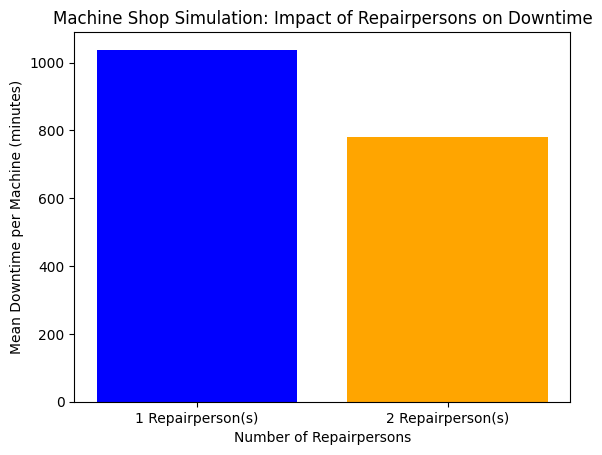

In [14]:
# Cell 5: SimPy Machine Shop Simulation with Plotting
import random
import simpy
import statistics
import matplotlib.pyplot as plt

# Parameters
RANDOM_SEED = 42
NUM_MACHINES = 2  # Number of machines in the shop
REPAIR_TIME = 30  # Time to repair a machine (minutes)
T_INTERFAIL = 300  # Time between failures (minutes)
SIM_TIME = 7 * 24 * 60  # Simulation time: 1 week (in minutes)
REPAIRPERSONS = [1, 2]  # Scenarios: 1 or 2 repairpersons
MEAN_DOWNTIMES = []  # Store mean downtime for each scenario

# Set random seed for reproducibility
random.seed(RANDOM_SEED)

# Machine class to model machine behavior
class Machine:
    def __init__(self, env, name, repairshop):
        self.env = env
        self.name = name
        self.repairshop = repairshop
        self.parts_made = 0
        self.broken = False
        self.downtime = 0
        self.process = env.process(self.working())
        env.process(self.break_machine())

    def working(self):
        """Machine produces parts until it breaks."""
        while True:
            try:
                while not self.broken:
                    self.parts_made += 1
                    print(f"{self.name} made part {self.parts_made} at time {self.env.now:.2f}")
                    yield self.env.timeout(10)  # Time to make one part
            except simpy.Interrupt:
                self.broken = True
                self.downtime -= self.env.now  # Start tracking downtime
                with self.repairshop.request() as req:
                    yield req
                    yield self.env.timeout(REPAIR_TIME)
                    print(f"{self.name} repaired at time {self.env.now:.2f}")
                self.broken = False
                self.downtime += self.env.now  # End tracking downtime

    def break_machine(self):
        """Machine breaks at random intervals."""
        while True:
            yield self.env.timeout(random.expovariate(1.0 / T_INTERFAIL))
            if not self.broken:
                print(f"{self.name} broke at time {self.env.now:.2f}")
                self.process.interrupt()

# Run simulation for a given number of repairpersons
def run_simulation(num_repairpersons):
    print(f"\n--- Simulation with {num_repairpersons} repairperson(s) ---")
    env = simpy.Environment()
    repairshop = simpy.Resource(env, num_repairpersons)
    machines = [Machine(env, f"Machine {i}", repairshop) for i in range(NUM_MACHINES)]
    env.run(until=SIM_TIME)
    downtimes = [machine.downtime for machine in machines]
    mean_downtime = statistics.mean(downtimes) if downtimes else 0
    print(f"Mean downtime per machine: {mean_downtime:.2f} minutes")
    return mean_downtime

# Run simulations for different numbers of repairpersons
for num in REPAIRPERSONS:
    mean_downtime = run_simulation(num)
    MEAN_DOWNTIMES.append(mean_downtime)

# Plot results
plt.bar([f"{num} Repairperson(s)" for num in REPAIRPERSONS], MEAN_DOWNTIMES, color=['blue', 'orange'])
plt.xlabel("Number of Repairpersons")
plt.ylabel("Mean Downtime per Machine (minutes)")
plt.title("Machine Shop Simulation: Impact of Repairpersons on Downtime")
plt.show()